# Sampling and Interpolation

Primeiro é necessário definir **como** o campo do fluído deve ser coletado e reconstruído via interpolação.

Lembrando que:
- O campo escalar de pressão é dado por **p**
- O campo vetorial de velocidade é dado por **u**
- Assume-se que o fluído é incompressível, então o campo de densidade não é coletado

In [1]:
# importação de bibliotecas a serem usadas

import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

%matplotlib inline

## Central Sampling

Os campos de pressão e velocidade são colocados no centro do grid.


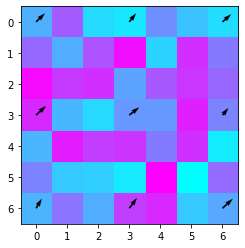

In [53]:
n = 3  # lado
d = 3  # dx = dy

x = [(i%n)*d for i in range(n*n)]   # [0, 3, 6, 0, 3, 6, 0, 3, 6]
y = [i//n*d for i in range(n*n)]    # [0, 0, 0, 3, 3, 3, 6, 6, 6]

p = np.random.rand((n-1)*d+1, (n-1)*d+1)
u = (np.random.rand(1, n*n)+1).tolist()[0]
v = (np.random.rand(1, n*n)+1).tolist()[0]

plt.figure(1)
plt.imshow(p, cmap='cool', interpolation='nearest')
plt.quiver(x, y, u, v)
plt.show()

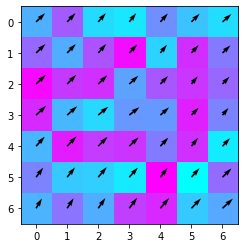

In [54]:
x_x = np.linspace(0, (n-1)*d, (n-1)*d+1)
y_y = np.linspace(0, (n-1)*d, (n-1)*d+1)
x_x, y_y = np.meshgrid(x_x, y_y)

points = np.transpose(np.vstack((x, y)))
u_interp = interpolate.griddata(points, u, (x_x, y_y), method='linear')
v_interp = interpolate.griddata(points, v, (x_x, y_y), method='linear')

plt.figure(2)
plt.imshow(p, cmap='cool', interpolation='nearest')
plt.quiver(x_x, y_y, u_interp, v_interp)
plt.show()

## Staggered grid sampling

O campo de pressão fica no centro, porém as componentes da velocidade ficam nas extremidades do grid.

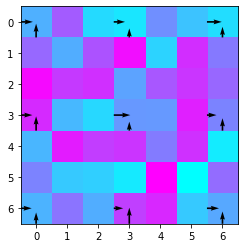

In [55]:
dv = 0.5

xx = [i-dv for i in x] # mas mesmo y
yy = [i+dv for i in y] # mas mesmo x

# criando u e v para cada um
ux = (np.random.rand(1, n*n)+1).tolist()[0]
vx = [0 for _ in range(n*n)]

uy = [0 for _ in range(n*n)]
vy = (np.random.rand(1, n*n)+1).tolist()[0]

plt.figure(3)
plt.imshow(p, cmap='cool', interpolation='nearest')
plt.quiver(xx, y, ux, vx)  # x component
plt.quiver(x, yy, uy, vy)  # y component
plt.show()

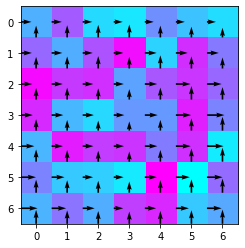

In [56]:
# criando u e v para cada um
ux = (np.random.rand(1, n*n) + 1).tolist()[0]
vx = [0 for _ in range(n*n)]

uy = [0 for _ in range(n*n)]
vy = (np.random.rand(1, n*n) + 1).tolist()[0]

# mesh grid para cada um
x_x = np.linspace(0-dv, (n-1)*d-dv, (n-1)*d+1)
y_x = np.linspace(0, (n-1)*d, (n-1)*d+1)
x_x, y_x = np.meshgrid(x_x, y_x)

x_y = np.linspace(0, (n-1)*d, (n-1)*d+1)
y_y = np.linspace(0+dv, (n-1)*d+dv, (n-1)*d+1)
x_y, y_y = np.meshgrid(x_y, y_y)

points_x = np.transpose(np.vstack((xx, y)))
points_y = np.transpose(np.vstack((x, yy)))

ux_interp = interpolate.griddata(points_x, ux, (x_x, y_x), method='linear')
vx_interp = interpolate.griddata(points_x, vx, (x_x, y_x), method='linear')

uy_interp = interpolate.griddata(points_y, uy, (x_y, y_y), method='linear')
vy_interp = interpolate.griddata(points_y, vy, (x_y, y_y), method='linear')

plt.figure(4)
plt.imshow(p, cmap='cool', interpolation='nearest')
plt.quiver(x_x, y_x, ux_interp, vx_interp)  # x component
plt.quiver(x_y, y_y, uy_interp, vy_interp)  # y component
plt.show()